In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[DataCamp Link](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)

# 1. Introduction

You will learn how to leverage basic plottings tools in Python, and how to annotate and personalize your time series plots. By the end of this chapter, you will be able to take any static dataset and produce compelling plots of your data. 

####Load your time series data


In [0]:
url_discoveries = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch1_discoveries.csv'

In [4]:
# Import pandas
import pandas as pd

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(url_discoveries)

# Display the first five lines of the DataFrame
print(discoveries.head(5))

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


In [5]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

date    object
Y        int64
dtype: object


In [0]:
# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

In [7]:
# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    datetime64[ns]
Y                int64
dtype: object


###Plot your first time series


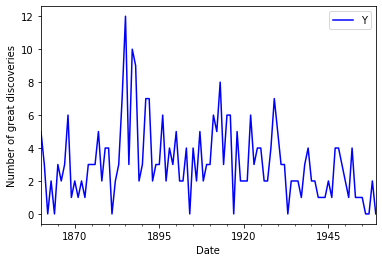

In [8]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

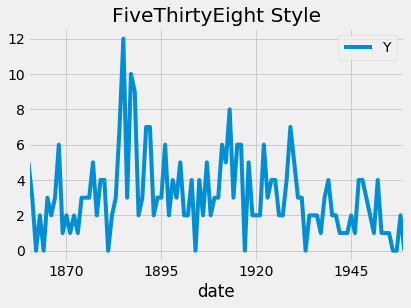

In [9]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

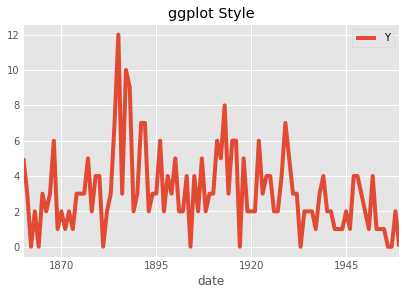

In [10]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

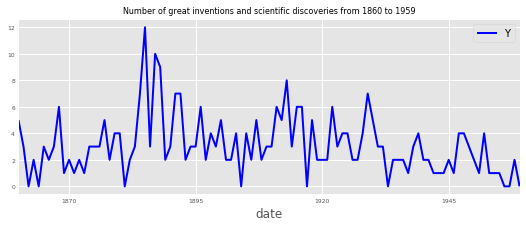

In [11]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

###Customize your time series plot


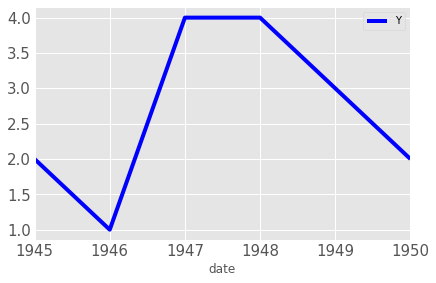

In [12]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945-01-01':'1950-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

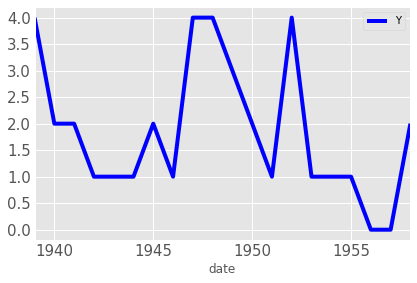

In [13]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-01-01':'1958-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

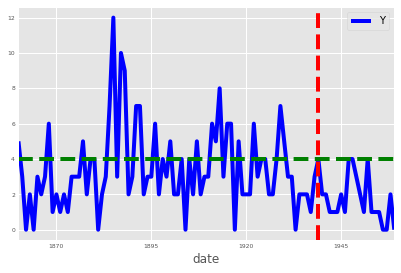

In [14]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

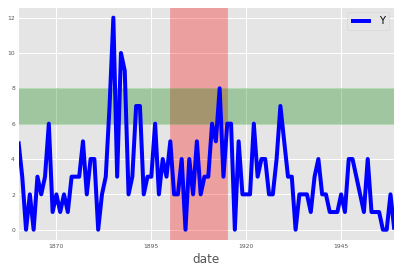

In [15]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region between the dates of 1900-01-01 and 1915-01-01
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region between the values of 6 and 8
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

# 2. Summary Statistics and Diagnostics

In this chapter, you will gain a deeper understanding of your time series data by computing summary statistics and plotting aggregated views of your data. 

###Clean your time series data


In [0]:
co2_levels = pd.read_csv('ch2_co2_levels.csv', parse_dates=True)

In [25]:
# Display first seven rows of co2_levels
print(co2_levels.head(7))

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4
5  1958-05-03  316.9
6  1958-05-10    NaN


In [76]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


In [19]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


###Plot aggregates of your data


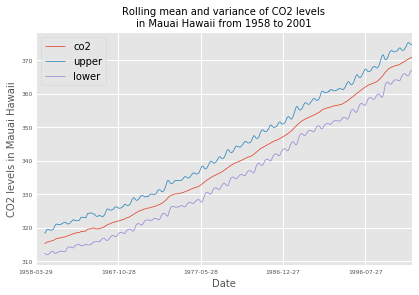

In [20]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

In [0]:
co2_levels.index = pd.to_datetime(co2_levels.index)

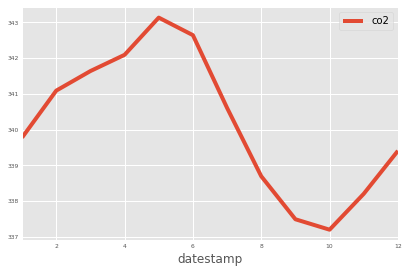

In [38]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

###Summarize the values in your time series data


In [40]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

               co2
count  2225.000000
mean    340.142247
std      17.003885
min     313.000000
25%     324.800000
50%     338.300000
75%     354.800000
max     373.900000


In [41]:
# Print out the minima of the co2 column in the co2_levels DataFrame
print(313.0)

313.0


In [42]:
# Print out the maxima of the co2 column in the co2_levels DataFrame
print(373.9)

373.9


No handles with labels found to put in legend.


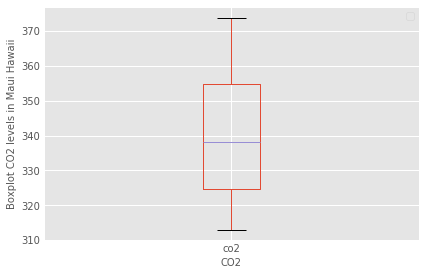

In [43]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

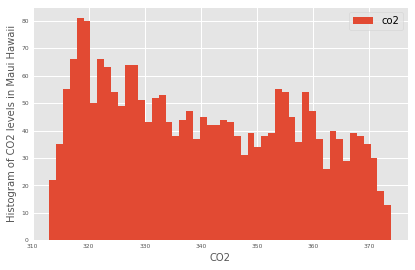

In [44]:
# Generate a histogram
ax = co2_levels['co2'].plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

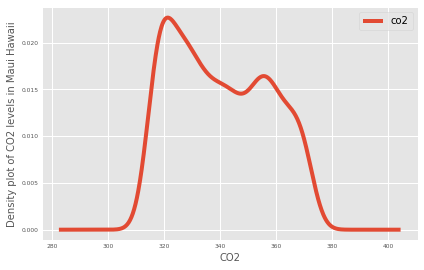

In [45]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

# 3. Seasonality, Trend and Noise 

You will go beyond summary statistics by learning about autocorrelation and partial autocorrelation plots. You will also learn how to automatically detect seasonality, trend and noise in your time series data. 

###Autocorrelation and Partial autocorrelation


In [92]:
co2_levels = co2_levels.dropna()
co2_levels.co2.isnull().sum()

0

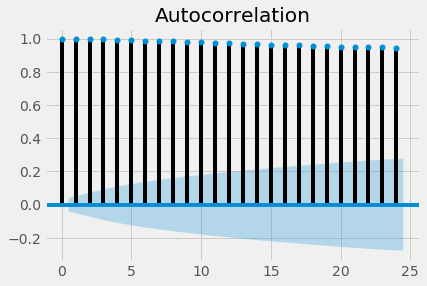

In [94]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

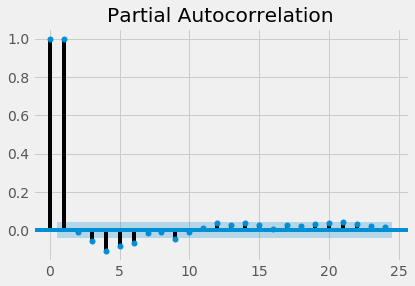

In [95]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

###Seasonality, trend and noise in time series data


In [0]:
co2_levels.index = pd.to_datetime(co2_levels.index)

In [109]:
co2_levels = co2_levels.reset_index()
co2_levels.dtypes

datestamp    datetime64[ns]
co2                 float64
dtype: object

In [110]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

AttributeError: ignored

In [0]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

###A quick review


In [0]:
airline = pd.read_csv('ch3_airline_passengers.csv', index_col='Month', parse_dates=True)

In [116]:
airline[:3]

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


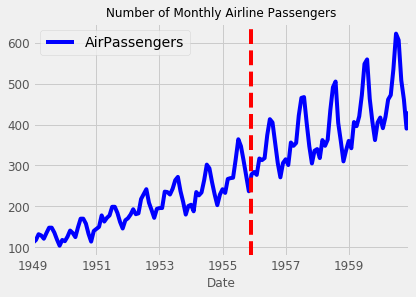

In [117]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

In [118]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


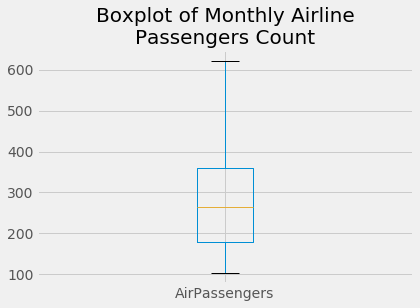

In [119]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

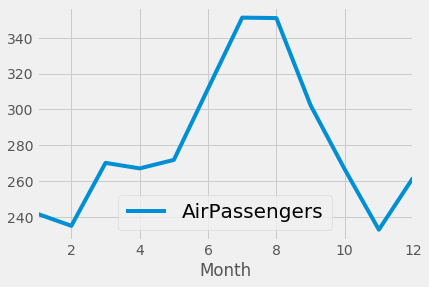

In [120]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

In [0]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [0]:
trend = trend.rename({'AirPassengers':'trend'}, axis=1)
seasonal = seasonal.rename({'AirPassengers':'seasonal'}, axis=1)

In [0]:
airline_decomposed = pd.concat([trend, seasonal], axis=1)

In [141]:
airline_decomposed

,trend,seasonal
Month,,
1949-01-01,NaN,-24.748737
1949-02-01,NaN,-36.188131
1949-03-01,NaN,-2.241162
1949-04-01,NaN,-8.036616
1949-05-01,NaN,-4.506313
...,...,...
1960-08-01,NaN,62.823232
1960-09-01,NaN,16.520202
1960-10-01,NaN,-20.642677


In [143]:
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head(5))

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


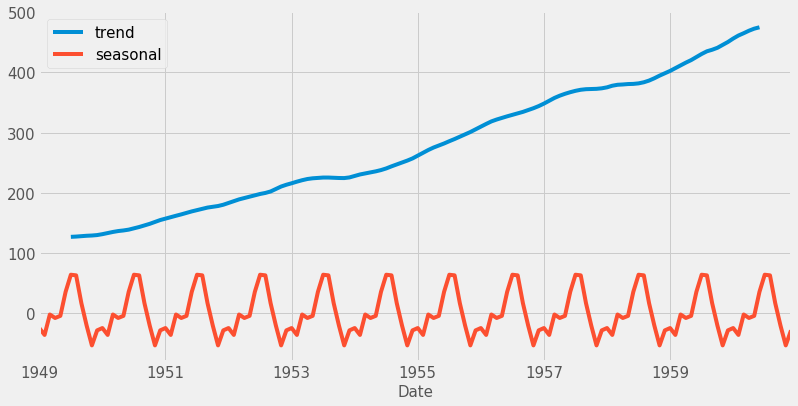

In [144]:
# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

# 4. Work with Multiple Time Series 

In the field of Data Science, it is common to be involved in projects where multiple time series need to be studied simultaneously. In this chapter, we will show you how to plot multiple time series at once, and how to discover and describe relationships between multiple time series. 

###Working with more than one time series


In [0]:
url_meat = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv'

In [146]:
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

         date   beef   veal  ...  broilers  other_chicken  turkey
0  1944-01-01  751.0   85.0  ...       NaN            NaN     NaN
1  1944-02-01  713.0   77.0  ...       NaN            NaN     NaN
2  1944-03-01  741.0   90.0  ...       NaN            NaN     NaN
3  1944-04-01  650.0   89.0  ...       NaN            NaN     NaN
4  1944-05-01  681.0  106.0  ...       NaN            NaN     NaN

[5 rows x 8 columns]


In [147]:
# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

              beef        veal  ...  other_chicken      turkey
count   827.000000  827.000000  ...     143.000000  635.000000
mean   1683.463362   54.198549  ...      43.033566  292.814646
std     501.698480   39.062804  ...       3.867141  162.482638
min     366.000000    8.800000  ...      32.300000   12.400000
25%    1231.500000   24.000000  ...      40.200000  154.150000
50%    1853.000000   40.000000  ...      43.400000  278.300000
75%    2070.000000   79.000000  ...      45.650000  449.150000
max    2512.000000  215.000000  ...      51.100000  585.100000

[8 rows x 7 columns]


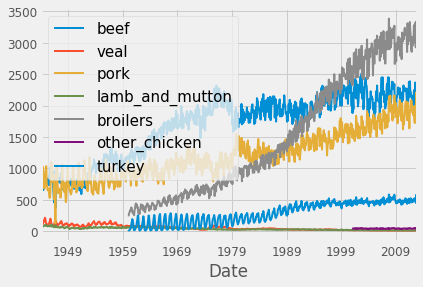

In [148]:
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

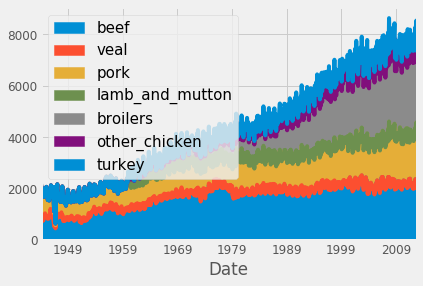

In [149]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

###Plot multiple time series


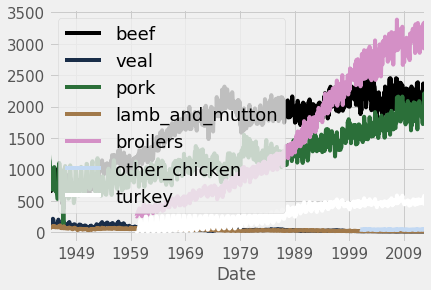

In [150]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

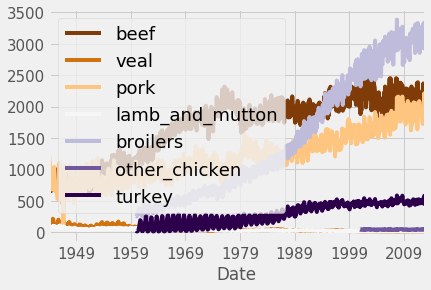

In [151]:
# Plot time series dataset using the PuOr color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

In [0]:
meat_mean = pd.DataFrame(np.array([[1683.46336155,   54.19854897, 1211.68379686,   38.36070133,
        1516.58251969,   43.03356643,  292.81464567]]))

In [155]:
meat_mean

,0,1,2,3,4,5,6
0,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


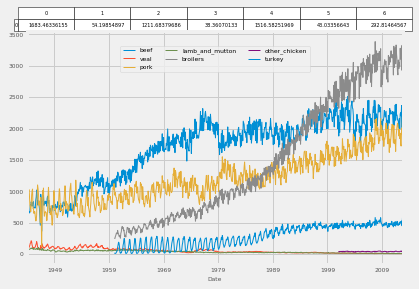

In [156]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

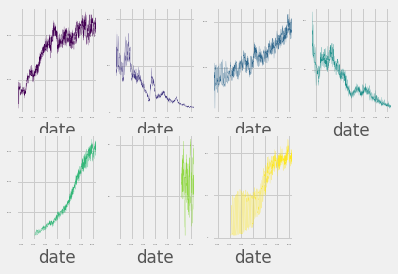

In [157]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2, 4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)
          
plt.show()

###Find relationships between multiple time series


In [158]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


In [159]:
# Print the correlation matrix between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


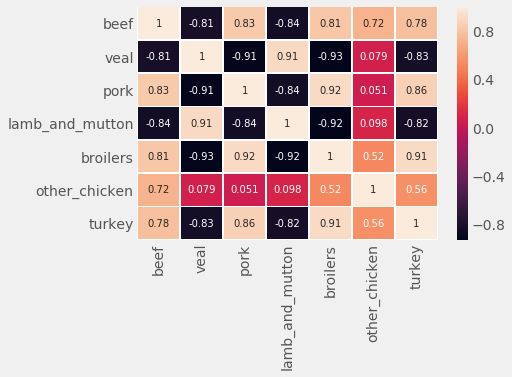

In [160]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

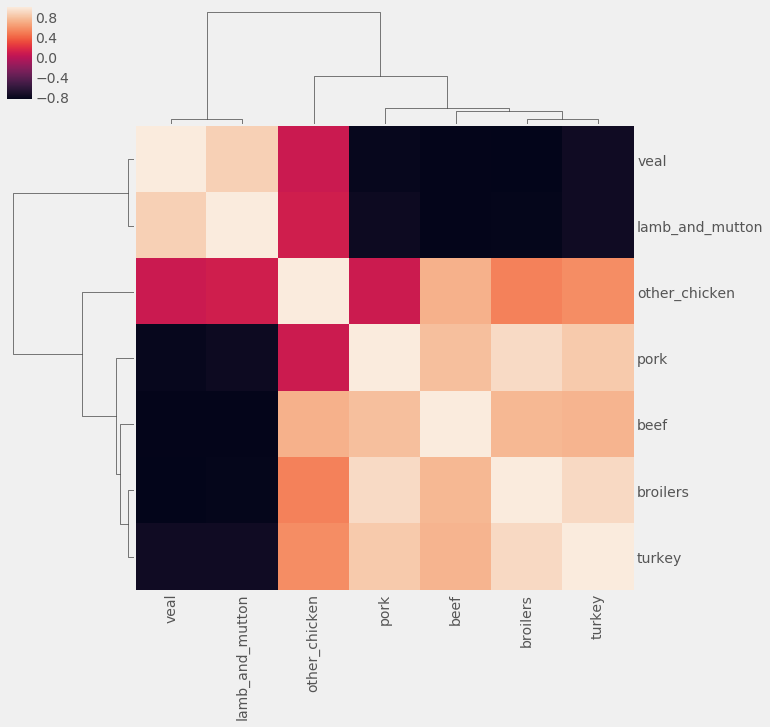

In [161]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

# 5. Case Study

This chapter will give you a chance to practice all the concepts covered in the course. You will visualize the unemployment rate in the US from 2000 to 2010. 

###Apply your knowledge to a new dataset


In [0]:
url_jobs = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch5_employment.csv'

In [165]:
# Read in jobs file
jobs = pd.read_csv(url_jobs)

# Print first five lines of your DataFrame
print(jobs.head(5))

    datestamp  ...  Wholesale and Retail Trade
0  2000-01-01  ...                         5.0
1  2000-02-01  ...                         5.2
2  2000-03-01  ...                         5.1
3  2000-04-01  ...                         4.1
4  2000-05-01  ...                         4.3

[5 rows x 17 columns]


In [166]:
# Check the type of each column in your DataFrame
print(jobs.dtypes)

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object


In [167]:
# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


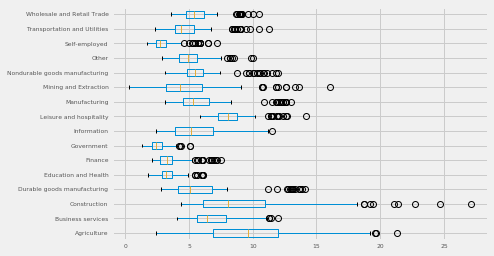

In [169]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

In [170]:
# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

       Agriculture  ...  Wholesale and Retail Trade
count   122.000000  ...                  122.000000
mean      9.840984  ...                    5.766393
std       3.962067  ...                    1.463417
min       2.400000  ...                    3.600000
25%       6.900000  ...                    4.800000
50%       9.600000  ...                    5.400000
75%      11.950000  ...                    6.200000
max      21.300000  ...                   10.500000

[8 rows x 16 columns]
Agriculture
Construction


###Beyond summary statistics


In [172]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head(5))

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


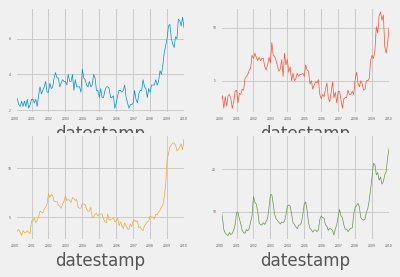

In [173]:
# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2, 2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

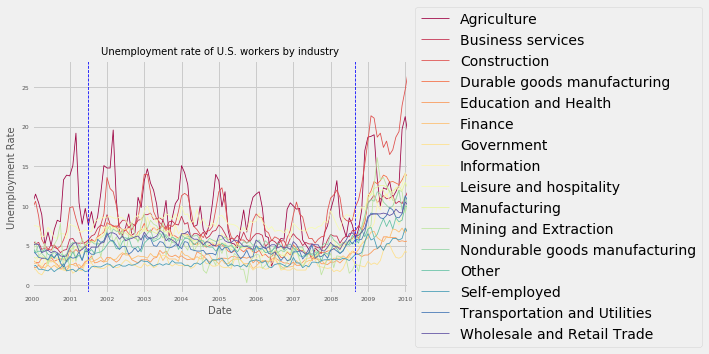

In [174]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

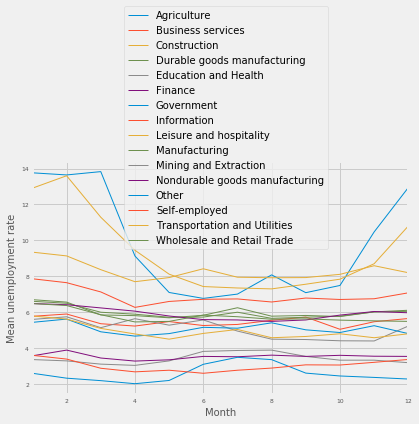

In [175]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

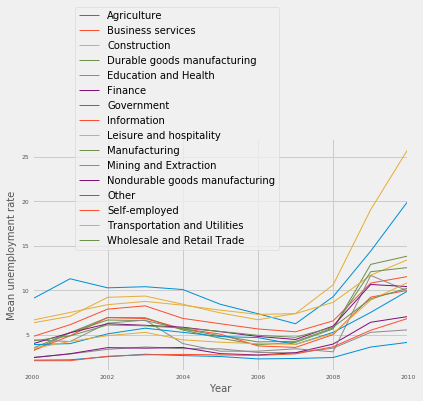

In [176]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

###Decompose time series data


In [0]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

In [0]:
jobs_seasonal = {}

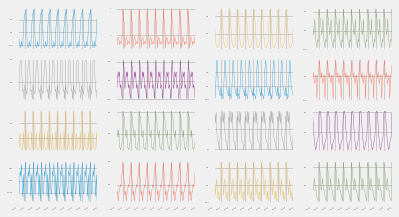

In [180]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4, 4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

###Compute correlations between time series


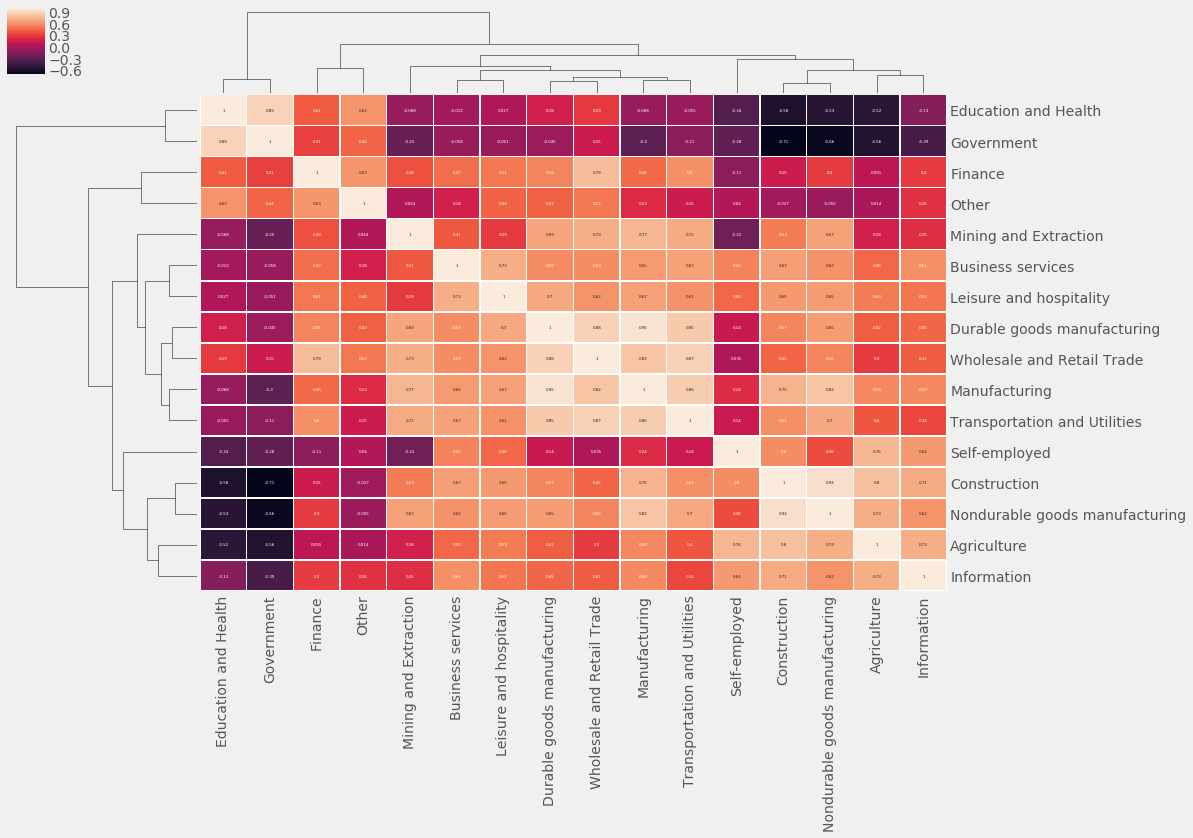

0.89


In [181]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)